<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 

# Econ 611
## HW 5
In this assignment, you will not be using jupyter notebooks. We have put starter code to answer the hw questions. <b>For every function you write, make sure to comment what it does in the proper format. In addition, unless told otherwise, you may not use modules to answer questions on your homeworks</b>.

### Warm-up: 
This should be done in a file called ```warm_up.py```  
#### Write a function ```factorial(x)``` that finds the factorial of an integer x
For example, ```factorial(4)``` should output 24.

### Main Questions
#### Write a function gradient_optimizer that uses a gradient to find a max/min of a function
This should be done in the file ```gradient_optimizer```
A gradient $\nabla f$ is the multivariate derivative of f. It has the unique propert that for any set of points $(x_1,...,x_n)$, $\nabla f(x_1,...,x_n)$ points towards an extremum. Therefore, you can find a max/min of f by starting with an initial guess of $(x_1,...,x_n)$ and iteratively updating it with the gradient. Therefore, the  equation to optimize using gradient is
\begin{equation}
(x_1,...,x_n)_{new} = (x_1,...,x_n)_{old} + t * \nabla f(x_1,...,x_n)_{old}
\end{equation}

where $t$ is a small scalar to control the size of the gradient when we take a step. At an extremum, $\nabla f = 0$. Since the sequence of $x$s (call it $x_n$) converges to an extremum, $\nabla x_n$ definitely converges to $0$ as long as the gradient is continuous. The definition of convergence to 0 is that at some point N, for any $n \geq N$, $|x_n-0| < \epsilon$. <b> We can assume $f$ is close enough to an extremum if $\nabla x_{new} < \epsilon$ </b>. Therefore, the algorithm to find the extremum is
```
xn = [0,...,0] # The length of list is the number of variables there are in the function
for i in range(max_iter):
    grad = gradient(f, xn)
    if all values in grad < eps:
        return xn
    xn = xold + gradient(f, xn)
    
grad = gradient(f, xn)
if all values in grad < eps:
    return xn
else:
    return None
```
  

```gradient_optimizer``` takes in 5 arguments. 
1. ```f``` is the function that we are optimizing. A function can be put in as a parameter by creating a function that is in the equation. For example, 2 possible ways to create a function for $f(x_1, x_2) = x_1^2x_2^2$ are:
```
lambda x: x ** 2
```  
where x is a numpy array of dimensions (1,2), and  
```
def f(x):
    return x ** 2
```
For simplicity, assume $f: \mathbb{R} \mapsto \mathbb{R}$ is differentiable. 
2. ```x0``` is the starting x value. This should be a numpy array.
3. ```eps``` is a <i>small</i> number that you use to test that $x_n$ is close to 0
4. ```t``` is the scalar described above
5. ```num_iter``` is the maximum number of iterations the function is allowed to make before it decides there is no extremum
Make sure to account for possible errors in the input that would cause your program to crash

You can use the function https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.approx_fprime.html to approximate the gradient or use the algorithm described in the first bonus opportunity  
  

<b>BONUS</b> Approximate the gradient.  
At a point $(c_1,...,c_n)$,
\begin{equation}
\frac{\partial f}{\partial x_i} = lim_{x_i \to c_i} \frac{f(c_1,...,x_i,...,c_n) - f(c_1,...,c_i,...,c_n)}{(c_1,...,x_i,...,c_n) - (c_1,...,c_i,...,c_n)}
\end{equation}
This means that 
\begin{equation}
\frac{\partial f}{\partial x_i} \approx \frac{f(x_1,...,x_i+\epsilon,...x_n) - f(x_1,...,x_i - \epsilon,...,x_n)}{2\epsilon}
\end{equation}
Therefore, the gradient of f at c is approximately
\begin{equation}
\nabla f(c_1,...,c_n) \approx [\frac{f(c_1+\epsilon,...,c_n) - f(c_1-\epsilon,...,c_n)}{2\epsilon}, ..., \frac{f(c_1,...,c_n+\epsilon) - f(c_1,...,c_n-\epsilon)}{2\epsilon}]
\end{equation}
We can use this fact to estimate the gradient with the following algorithm
```
grad = []
for i in len(x):
    der = (f(xpluseps) - f(xminuseps))/(2 * eps)
    grad.append(der)
```
  

<b> BONUS</b>: PCA is a data dimensionality reduction technique. For an $nxm$ dimension matrix, there are $min(n-1, m)$ principal components, and they are ordered so that the higher principal component explains more of the variance in the data (the first principal component explains more variance than the second...). One reason PCA is used is to reduce the dimension of the data to 1 or 2 dimensions so it can be plotted.  
  
Use PCA (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to grab the first principal component for each iteration of x and make a scatter plot of iteration vs 1st principal component of x. Make your plot using the module ```matplotlib```

<b>Examples:</b>

zero for f(x) = x1^2x2^2x3^2: [3.2831997634823315e-05, 4.9247996452291656e-05, 0.0]


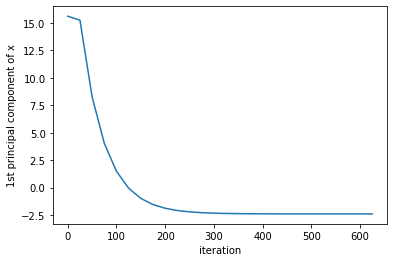

In [5]:
from hw4_key import gradient_optimizer_key, plot
solution, xs = gradient_optimizer_key(lambda x: [xi**2 for xi in x], [10, 15, 0])
print(f'zero for f(x) = x1^2x2^2x3^2: {solution}')
plot(xs)

#### Now create a class ```cross-entropy_optimizer```
This should be done in a file ```cross-entropy.py```.  
##### Background
Suppose you have two sets of data: an nx1 matrix $Y$ that has binary values (all values in $Y$ are 1 or 0) and an nxk matrix $X$. You want to fit a kx1 matrix $\beta$ so that for each row $i \in n$, $\frac{1}{1+e^{-x_i\beta}}$ is as close to $Y_i$ as possible. Below is the graph of $\frac{1}{1+e^{c}}$.
<img src = "sigmoid.png">
As can be seen, when $x_i\beta$ is very positive, $\frac{1}{1+e^{-x_i\beta}}$ is close to 1 and when $x_i\beta$ is very negative, $\frac{1}{1+e^{-x_i\beta}}$ is close to 0.  
  
The function you will are trying to optimize is
\begin{equation}
L(\beta) = \sum_{i=1}^{n} y_ilog(\frac{1}{1+e^{-x_i\beta}}) + (1 - y_i)log(1 -  \frac{1}{1+e^{-x_i\beta}})
\end{equation}

##### Initialization
The ```__init__``` input parameters should be 2 numpy arrays ```X``` and ```Y```. You do not need to worry about the ```False``` case. Inside the ```__init__```, you should create a class variable named ```beta``` that is a numpy array of zeros with shape (num X columns, 1)

##### Create a function ```sigmoid```
This function will take in two variables ```X``` and ```beta``` and return $\frac{1}{1+e^{-X\beta}}$ (Note: the output to this is the same as if you ran $\frac{1}{1+e^{-x_i\beta}}$ on each $i$

##### Create a function```:```
This function will take in three variables: ```X```, ```Y```, and ```beta```, and it will return $-\sum_{i=1}^{n} y_ilog(\frac{1}{1+e^{-x_i\beta}}) + (1 - y_i)log(1 -  \frac{1}{1+e^{-x_i\beta}})$. Bonus: Do this only using numpy functions (no for loops).

##### Create a function ```fit_approx```
Import your gradient optimizer function that you created in the other file. Run it using ```cross_entropy``` as ```f``` and class variable ```beta``` as ```x0```. Reset ```beta``` as the output.

##### Create a function ```fit```
The actual gradient of this cross-entropy function is $X^T(Y-\frac{1}{1+e^{-X\beta}})$. Using the gradient optimizing algorithm from above, solve to find the optimal $\beta$ and set it as a class variable ```beta_2```. For your convenience, here is the algorithm:

```
beta_2 = zeros
for i in num_epochs:
    p = sigmoid(X, beta_2)
    grad = X.T(Y-p)
    beta_2 = beta_2 - t * grad
```
  
  
I have provided you with sample X and Y as well as a function to plot the data and the classification line from the two betas. Make sure that ```fit``` and ```fit_approx``` have close to the same values for $\beta$, and the classification line is between the two classes. Below is a sample output for the graph.
<img src = "region.png">

In [70]:
Xs = [1,2,3,4]
f = lambda y: y ** 2

class gradient_optimizer:
    def __init__(self, f, x):
        self.f = f
        self.x = x
    
    def gradient(self):
        '''Calculate derivations of each element in x, store gradient'''
        grad = []
        for current_x in self.x:
            xplus_eps = current_x + eps
            xminus_eps = current_x - eps
            derv = (self.f(xplus_eps) - self.f(xminus_eps))/(2 * eps)
            grad.append(derv)
        return grad
    def gradient_optimizer(self, eps = 0.0001, t = 0.01, num_iter = 1000):
        '''Gradient Optimizer over numerous iterations'''
        for i in range(num_iter):
            # Gradient with updated X
            grad = gradient()
            # Check if within acceptable range
            if all(value < eps for value in grad):
                return self.x
            # Scalar Step
            t_into_grad = [t * grads for grads in gradient()]
            # Subtract each gradient from Xs, update X vector
            self.x = [x_old - g for x_old, g in zip(self.x, t_into_grad)]

new_func = gradient_optimizer(f, Xs)
new_func.gradient_optimizer()


TypeError: gradient() missing 2 required positional arguments: 'f' and 'x'

In [80]:
## Practice for Classes
class Dog:
    def __init__(self, name = 'Spot', age = 2):
        # This is what every dog will have. What makes up a dog
        self.name = name
        self.age = age # these assign values to characterize the dog
        # I would like to have this return statement but can't have a return statment in the __init__
        #return "What a good boy!"
    def __str__(self):
        # But I can get that return statement from before here though
        return self.name+ ' is such a good boy!'
    def walk(self, owner = 'Annie', now = 'Now!'):
        # This is an optional function that you could pass, unlike _init_ which will be passed for every dog defined by class Dog()
        return print(owner.title() + ", you should probably walk your dog, " + self.name.title() + ", since he is such a good boy. \nYou should go " + now)

# Assigning characteristics to a dog as they are traits from their _init_
marshmellow = Dog('marshmellow', .5)
print(marshmellow.__str__())
# New dog, who is about to go on a walk
tigger = Dog('tigger', 6)
tigger.walk('Annie')
# Or maybe you want to go on a walk later
marshmellow.walk('Ryan', 'later...')
print('\nTest')
# No arguments, and calling a function within a class in one line. This is optimally what we would want
spot_walk = Dog().walk()

marshmellow is such a good boy!
Annie, you should probably walk your dog, Tigger, since he is such a good boy. 
You should go Now!
Ryan, you should probably walk your dog, Marshmellow, since he is such a good boy. 
You should go later...

Test
Annie, you should probably walk your dog, Spot, since he is such a good boy. 
You should go Now!


In [49]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy
from scipy import optimize

#gradient optimizer
def gradient_optimizer(f, x0, eps=.0001, t = .01, num_iter=1000000):
    for i in range(num_iter):
        grad = optimize.approx_fprime(x0, f, eps)
        if all(z < eps for z in grad):
            x0 = x0 - t * grad
            return x0 
        else:
            x0 = x0 - t * grad
            grad = optimize.approx_fprime(x0, f, eps)
# Class
class Cross_Entropy:
    '''The Cross Entropy Class'''
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.beta = np.zeros((x.shape[1], 1))
    
    def sigmoid(self):
        '''The Sigmoid form for the log likelihood function''' 
        return 1 / (1 + np.exp(np.dot(-self.x, self.beta)))
    
    def reg(self):
        '''The Log Likelihood Function'''
        return -sum(self.y * np.log(self.sigmoid()) + (1 - self.y) * np.log(1 - self.sigmoid()))
    
    def fit_approx(self):
        fitted_approx = gradient_optimizer(self.reg(), self.beta)   
        return beta_new
    
    def fit(self, t = 0.01, num_epochs = 1000):
        '''The actual cross gradient provided by Javi'''
        beta_2 = np.zeros((self.x.shape[1], 1))
        for i in num_epochs:
            p = self.sigmoid(self.x, beta_2)
            grad = self.x.T(self.y - p)
            beta_2 = beta_2 - t * grad
        return beta_2

def sample_data():
    numpos = 100
    numneg = 100
    
    mupos = [1.0, 1.0]
    covpos = np.array([[1.0, 0.0], [0.0, 1.0]])
    muneg = [-1.0, -1.0]
    covneg = np.array([[1.0, 0.0], [0.0, 1.0]])
    
    Xpos = np.ones((numpos, 3))
    for i in range(numpos):
        Xpos[i, 0:2] = np.random.multivariate_normal(mupos, covpos)
    Ypos = np.ones((numpos, 1))
        
    Xneg = np.ones((numneg, 3))
    for i in range(numneg):
        Xneg[i, 0:2] = np.random.multivariate_normal(muneg, covneg)
    Yneg = np.zeros((numneg, 1))
    
    X = np.concatenate((Xpos, Xneg))
    Y = np.concatenate((Ypos, Yneg))
    
    return X, Y, Xpos, Xneg

def plotline(beta, Xpos, Xneg):
    xVals = np.linspace(-3, 3, 100) # list of 100 evenly spaced numbers between xMin and xMax
    yVals = (-beta[0] * xVals - beta[2])/beta[1] # a1x + a2y+a3 = 0, so y = (-a1x-a3)/a2
    idxs = np.where((yVals >= -3) & (yVals <= 3))
    plt.scatter(Xpos[:,0],Xpos[:,1])
    plt.scatter(Xneg[:,0],Xneg[:,1])
    plt.plot(xVals[idxs], yVals[idxs])

In [50]:
f = lambda y: y ** 2

test_data = sample_data()
test_X = test_data[0]
test_Y = test_data[1]
test_Xpos = test_data[2]
test_Xneg = test_data[3]

test_run = Cross_Entropy(test_X, test_Y)
test_fit_approx_beta = test_run.fit_approx()
test_fit_beta = test_run.fit()
test_plot_approx = test_run.plotline(test_fit_approx_beta, test_Xpos, test_Xneg)
test_plot_fit = test_run.plotline(test_fit_beta, test_Xpos, test_Xneg)


TypeError: 'numpy.ndarray' object is not callable